# Verifying that lateral GABA inhibtion affects firing rate in a population

In [1]:
%matplotlib inline

import os
import numpy as np
network_path = os.path.join("..", "networks", "sten_1_contralateral")
network_file = os.path.join(network_path, "network-synapses-minimal.hdf5")
simulation_file_with_synapses = os.path.join(network_path, "simulation", "output-with-synapses-sten_1-A.hdf5")
simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses-sten_1-A.hdf5")
duration = 18

# Plot network

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_1_contralateral/network-config.json
Population unit 0 has 32000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 0 has 32000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


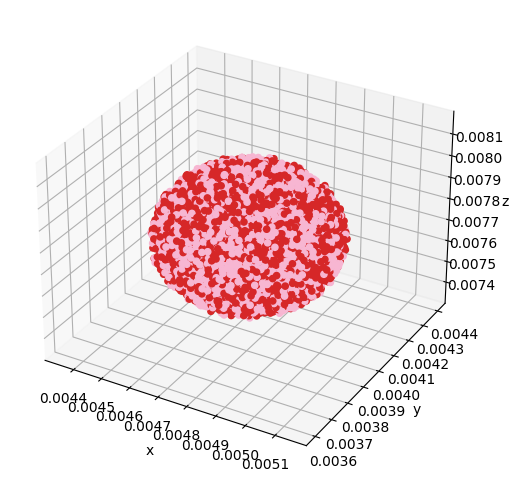

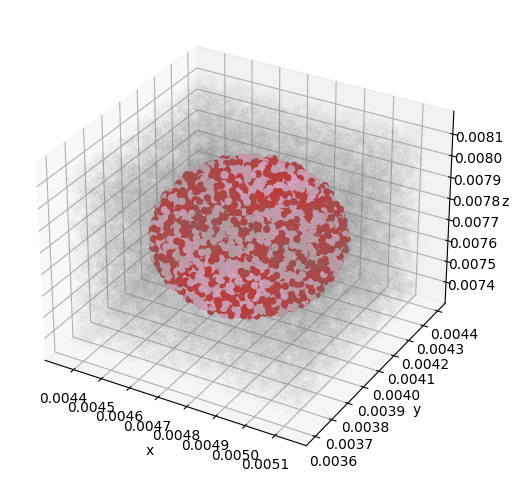

In [2]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_1_contralateral/network-config.json
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


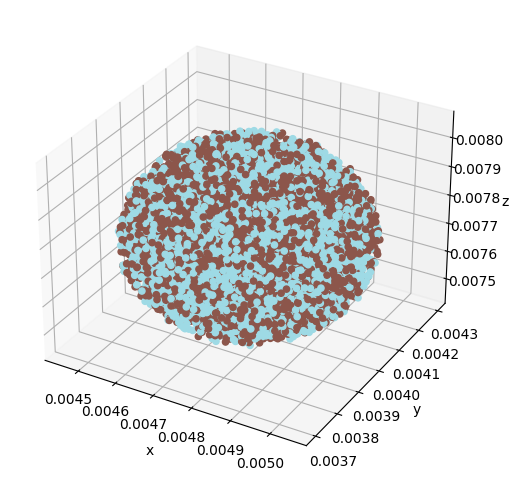

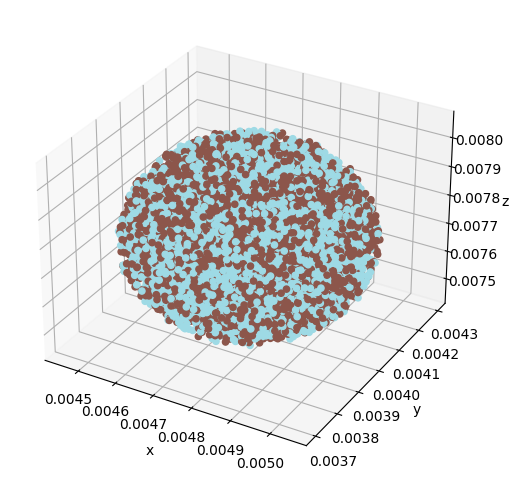

In [3]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

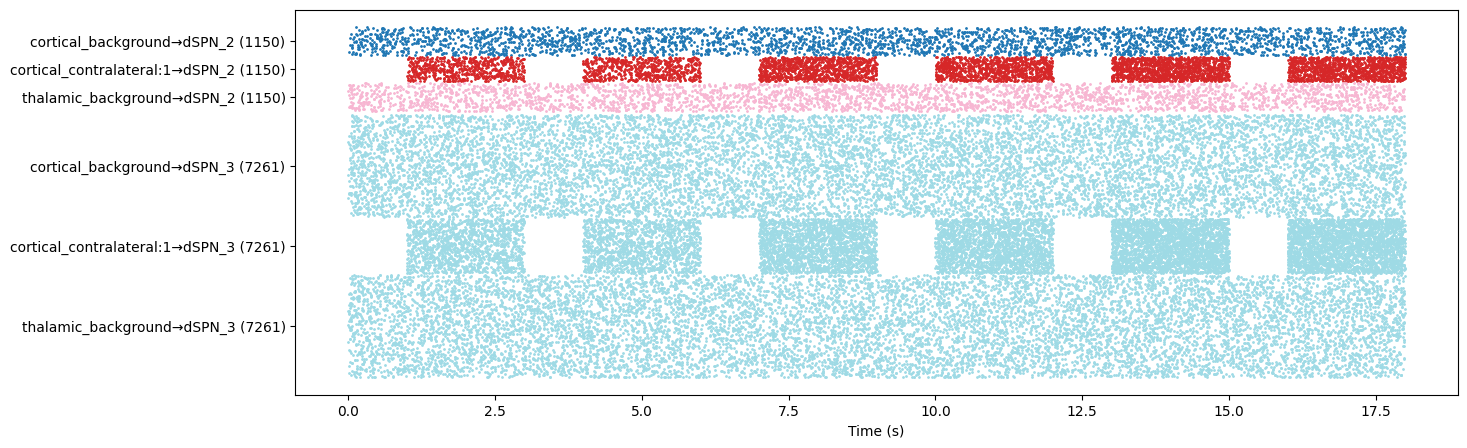

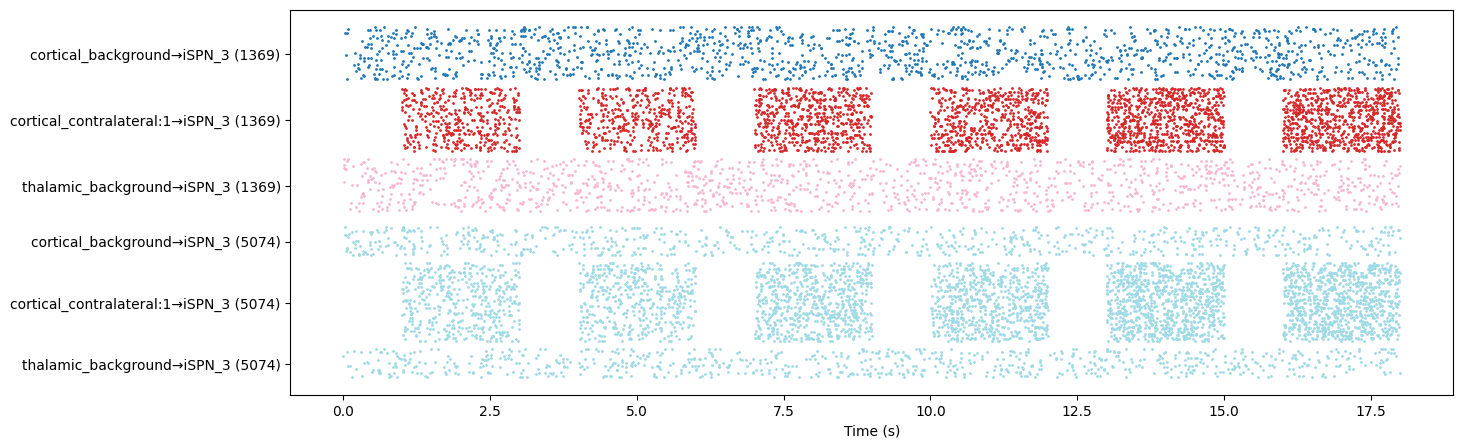

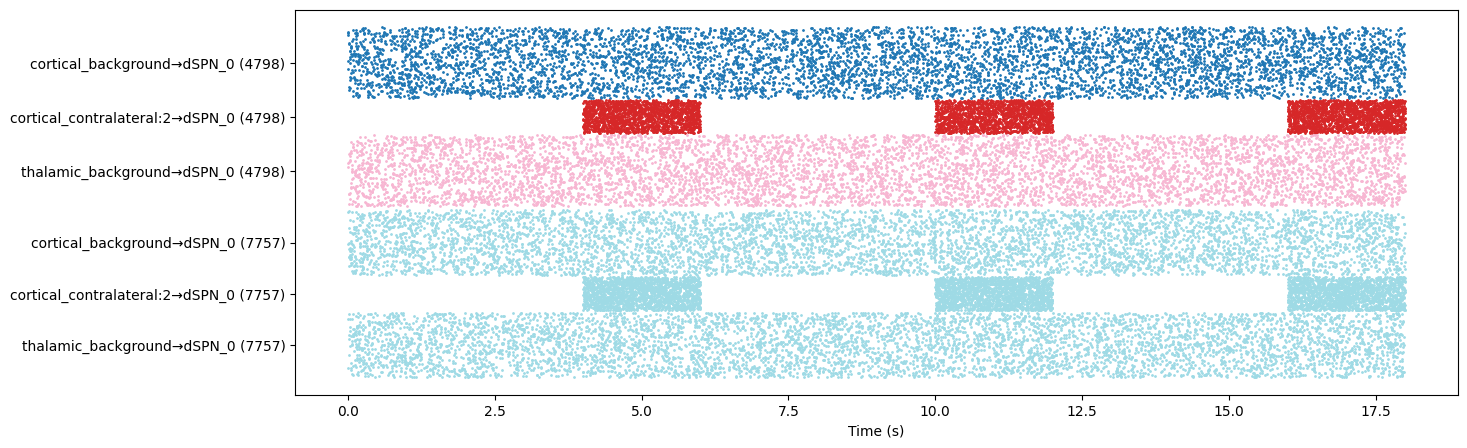

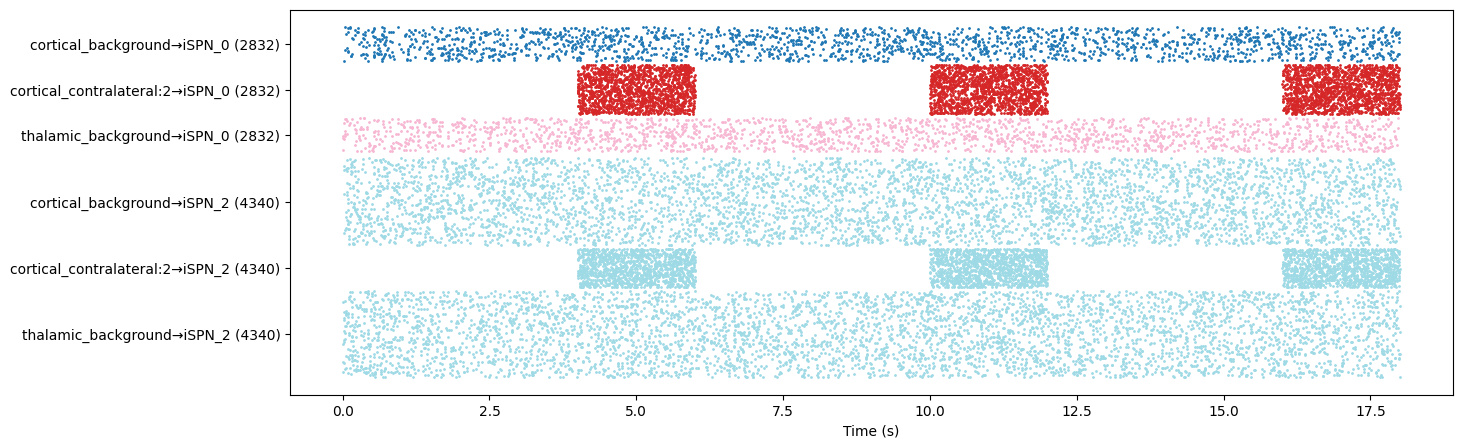

In [4]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_file)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

In [5]:
# Cleanup
pn = None
spi = None

# Plot neuron activity

## With lateral inhibtion

In [6]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_with_synapses)# 

# spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_1_contralateral/simulation/output-with-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
8: (dSPN_0, pb0529fb9, mbb8e5b24)
141: (dSPN_0, pb0529fb9, mf702205f)
564: (dSPN_0, p1863c9a5, m37886c78)
909: (dSPN_0, p8bf90d1f, m22be6817)
916: (dSPN_0, p1863c9a5, m37886c78)
1078: (dSPN_0, pb0529fb9, m9fda9b20)
1400: (dSPN_0, p1863c9a5, m22be6817)
1403: (dSPN_0, p8bf90d1f, mc710c1a4)
1408: (dSPN_0, p1863c9a5, m37886c78)
1421: (dSPN_0, pb0529fb9, m37886c78)
1432: (dSPN_0, pe6ec2d4b, m9fda9b20)
1803: (dSPN_0, pd01ac450, m37886c78)
2116: (dSPN_0, p7aa400d6, m9fda9b20)
2130: (dSPN_0, p1863c9a5, m37886c78)
2461: (dSPN_0, pb0529fb9, m37886c78)
2577: (dSPN_0, p8bf90d1f, mbb8e5b24)
2584: (dSPN_0, p1863c9a5, m37886c78)
2616: (dSPN_0, pd01ac450, m22be6817)
2621: (dSPN_0, p1863c9a5, m22be6817)
3435: (dSPN_0, pd01ac450, mbb8e5b24)
3454: (dSPN_0, p7aa400d6, m37886c78)
3784: (dSPN_0, p1863c9a5, mc710c1a4)
3792: (dSPN_0,

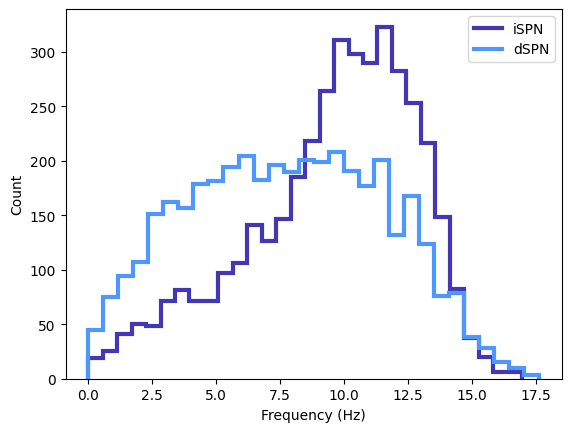

In [7]:
spr.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_1_contralateral/figures/spike-frequency-pop-units1-2.pdf


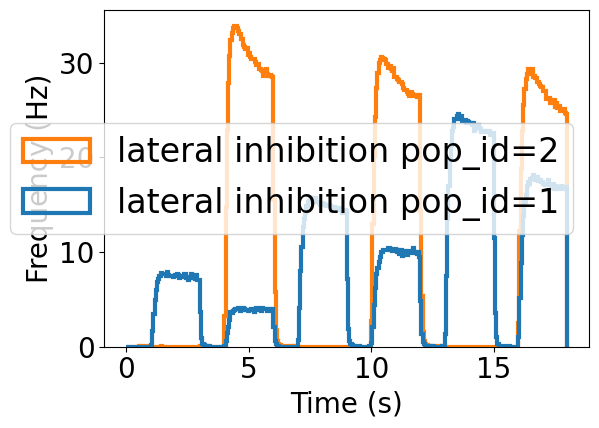

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [8]:
spr.plot_spike_histogram(label_text="lateral inhibition pop_id=")

## Without lateral inhibition

In [9]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_no_synapses)

# spr_no.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_1_contralateral/simulation/output-no-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
747: (dSPN_0, pb0529fb9, m37886c78)
1088: (dSPN_0, p7aa400d6, m37886c78)
2072: (iSPN_3, p57956f10, m1083058d)
2132: (dSPN_0, p1863c9a5, mc710c1a4)
2585: (dSPN_0, pe6ec2d4b, mc710c1a4)
2621: (dSPN_0, p1863c9a5, m22be6817)
2723: (dSPN_2, p185b99a1, mdf60297d)
4117: (dSPN_0, pb0529fb9, m37886c78)
4430: (dSPN_0, p1863c9a5, m22be6817)
4447: (dSPN_0, pb0529fb9, mbb8e5b24)
4817: (dSPN_0, p7aa400d6, m22be6817)
5108: (iSPN_3, p57956f10, m1083058d)
5359: (dSPN_0, p1863c9a5, m22be6817)
5360: (dSPN_0, pb0529fb9, mbb8e5b24)
5704: (dSPN_0, p8bf90d1f, m9fda9b20)
6078: (dSPN_0, pb0529fb9, m9fda9b20)
6115: (dSPN_2, pb267a31a, mf0350288)
6361: (dSPN_2, pb267a31a, mf0350288)
7029: (iSPN_3, p57956f10, m1083058d)
7225: (dSPN_0, pb0529fb9, m9fda9b20)
7435: (dSPN_0, p510bab86, mc710c1a4)
7437: (dSPN_0, pb0529fb9, mbb8e5b24)
7756: (dSP

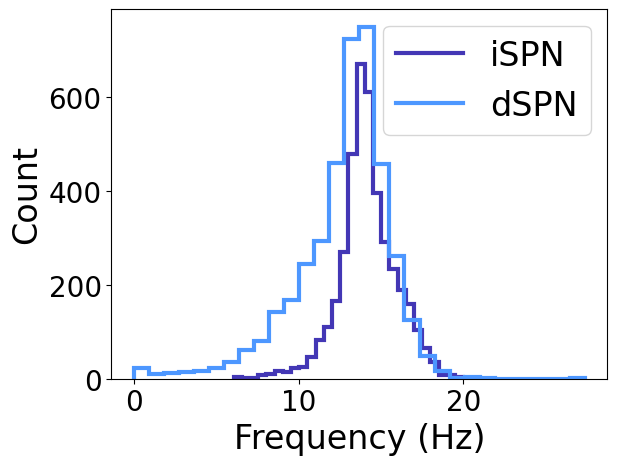

In [10]:
spr_no.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_1_contralateral/figures/spike-frequency-pop-units1-2.pdf


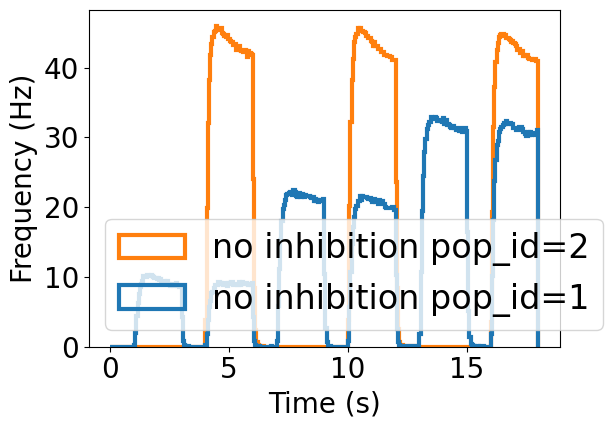

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [11]:
spr_no.plot_spike_histogram(label_text="no inhibition pop_id=")

# Summarising difference in activity (with and without lateral inhibition)

Saving figure ../networks/sten_1_contralateral/figures/spike-frequency-pop-units1-2.pdf


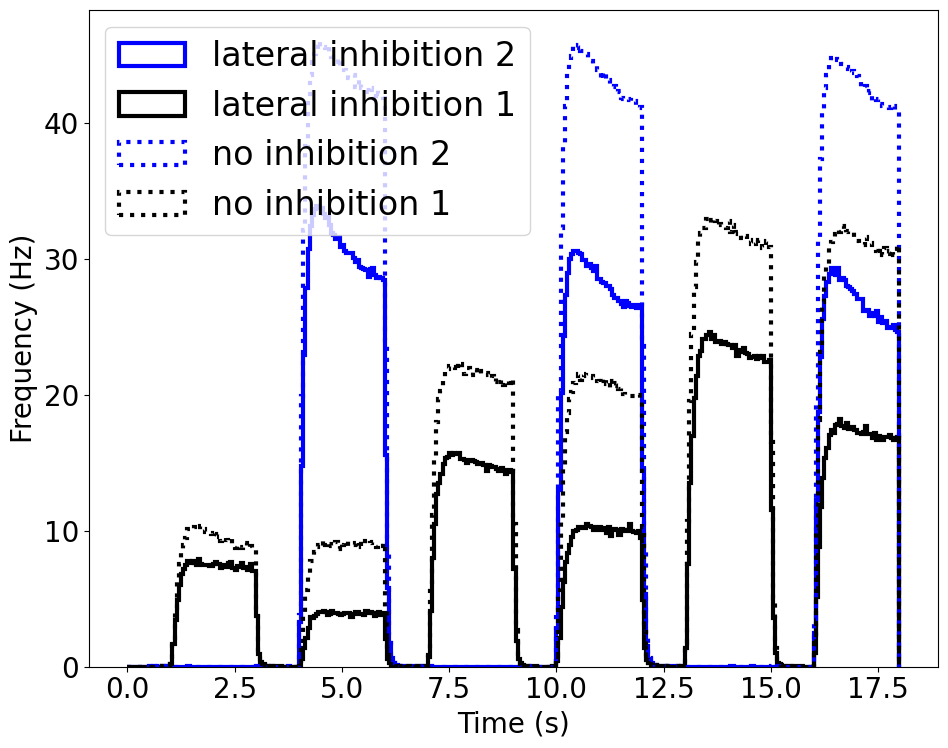

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [12]:
ax = spr.plot_spike_histogram(label_text="lateral inhibition ", show_figure=False, save_figure=False, fig_size=(10,8), colour=["black", "blue"])
spr_no.plot_spike_histogram(ax=ax, label_text="no inhibition ", show_figure=True, save_figure=True, linestyle=":", colour=["black", "blue"])

In [13]:
time_ranges = [(2,3), (5,6), (8,9), (11,12), (14,15), (17,18)]

pop_id1 = spr.snudda_load.get_population_unit_members(population_unit=1)
pop_id2 = spr.snudda_load.get_population_unit_members(population_unit=2)

with_lat_freq_table1 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id1, time_ranges=time_ranges)
with_lat_freq_table2 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id2, time_ranges=time_ranges)

no_lat_freq_table1 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id1, time_ranges=time_ranges)
no_lat_freq_table2 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id2, time_ranges=time_ranges)



In [14]:
with_lat_freq1_mean = np.mean(with_lat_freq_table1, axis=0)
with_lat_freq2_mean = np.mean(with_lat_freq_table2, axis=0)
no_lat_freq1_mean = np.mean(no_lat_freq_table1, axis=0)
no_lat_freq2_mean = np.mean(no_lat_freq_table2, axis=0)

n1_cells = with_lat_freq_table1.shape[0]
n2_cells = with_lat_freq_table2.shape[0]

# Standard error of the mean
with_lat_freq1_std = np.std(with_lat_freq_table1, axis=0) / np.sqrt(n1_cells)
with_lat_freq2_std = np.std(with_lat_freq_table2, axis=0) / np.sqrt(n2_cells)
no_lat_freq1_std = np.std(no_lat_freq_table1, axis=0) / np.sqrt(n1_cells)
no_lat_freq2_std = np.std(no_lat_freq_table2, axis=0) / np.sqrt(n2_cells)

In [15]:
print("With lateral inhibition")
for freq1_mean, freq1_std, freq2_mean, freq2_std in zip(with_lat_freq1_mean, with_lat_freq1_std, with_lat_freq2_mean,with_lat_freq2_std):
    print(f"Freq 1: {freq1_mean:.2f} +/- {freq1_std:.2f}\tFreq 2: {freq2_mean:.2f} +/- {freq2_std:.2f}")

With lateral inhibition
Freq 1: 7.38 +/- 0.08	Freq 2: 0.01 +/- 0.00
Freq 1: 3.92 +/- 0.06	Freq 2: 29.49 +/- 0.16
Freq 1: 14.68 +/- 0.11	Freq 2: 0.00 +/- 0.00
Freq 1: 10.00 +/- 0.11	Freq 2: 27.14 +/- 0.17
Freq 1: 22.98 +/- 0.14	Freq 2: 0.01 +/- 0.00
Freq 1: 16.99 +/- 0.16	Freq 2: 25.72 +/- 0.18


In [16]:
print("No lateral inhibition")
for freq1_mean, freq1_std, freq2_mean, freq2_std in zip(no_lat_freq1_mean, no_lat_freq1_std, no_lat_freq2_mean,no_lat_freq2_std):
    print(f"Freq 1: {freq1_mean:.2f} +/- {freq1_std:.2f}\tFreq 2: {freq2_mean:.2f} +/- {freq2_std:.2f}")

No lateral inhibition
Freq 1: 9.10 +/- 0.09	Freq 2: 0.01 +/- 0.00
Freq 1: 9.02 +/- 0.09	Freq 2: 42.72 +/- 0.10
Freq 1: 21.30 +/- 0.12	Freq 2: 0.01 +/- 0.00
Freq 1: 20.39 +/- 0.12	Freq 2: 42.22 +/- 0.10
Freq 1: 31.48 +/- 0.11	Freq 2: 0.01 +/- 0.01
Freq 1: 30.81 +/- 0.12	Freq 2: 41.81 +/- 0.10


In [17]:
with_lat_n_firing1 = np.sum(with_lat_freq_table1 > 0, axis=0)
with_lat_n_firing2 = np.sum(with_lat_freq_table2 > 0, axis=0)

no_lat_n_firing1 = np.sum(no_lat_freq_table1 > 0, axis=0)
no_lat_n_firing2 = np.sum(no_lat_freq_table2 > 0, axis=0)

In [18]:
print("With lateral inhibition")
for n1_active, n2_active in zip(with_lat_n_firing1, with_lat_n_firing2):
    print(f"Neurons active 1: {n1_active}/{n1_cells}\tNeurons active 2: {n2_active}/{n2_cells}")

With lateral inhibition
Neurons active 1: 3714/4000	Neurons active 2: 17/4000
Neurons active 1: 3059/4000	Neurons active 2: 3977/4000
Neurons active 1: 3926/4000	Neurons active 2: 10/4000
Neurons active 1: 3662/4000	Neurons active 2: 3960/4000
Neurons active 1: 3963/4000	Neurons active 2: 15/4000
Neurons active 1: 3850/4000	Neurons active 2: 3929/4000


In [19]:
print("No lateral inhibition")
for n1_active, n2_active in zip(no_lat_n_firing1, no_lat_n_firing2):
    print(f"Neurons active 1: {n1_active}/{n1_cells}\tNeurons active 2: {n2_active}/{n2_cells}")

No lateral inhibition
Neurons active 1: 3684/4000	Neurons active 2: 19/4000
Neurons active 1: 3667/4000	Neurons active 2: 3985/4000
Neurons active 1: 3911/4000	Neurons active 2: 23/4000
Neurons active 1: 3915/4000	Neurons active 2: 3985/4000
Neurons active 1: 3952/4000	Neurons active 2: 12/4000
Neurons active 1: 3945/4000	Neurons active 2: 3988/4000


In [20]:
# Cleanup
spr = None
spr_no = None

# Plotting the traces for the two cases to make sure it looks ok

In [21]:
from snudda.plotting.plot_traces import PlotTraces
pt_with_syn = PlotTraces(output_file=simulation_file_with_synapses, network_file=network_file)
# Use trace_id to specify which traces


Loading network info from ../networks/sten_1_contralateral/network-synapses-minimal.hdf5
Loading input info from ../networks/sten_1_contralateral/input-spikes.hdf5
Loading ../networks/sten_1_contralateral/simulation/output-with-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
8: (dSPN_0, pb0529fb9, mbb8e5b24)
141: (dSPN_0, pb0529fb9, mf702205f)
564: (dSPN_0, p1863c9a5, m37886c78)
909: (dSPN_0, p8bf90d1f, m22be6817)
916: (dSPN_0, p1863c9a5, m37886c78)
1078: (dSPN_0, pb0529fb9, m9fda9b20)
1400: (dSPN_0, p1863c9a5, m22be6817)
1403: (dSPN_0, p8bf90d1f, mc710c1a4)
1408: (dSPN_0, p1863c9a5, m37886c78)
1421: (dSPN_0, pb0529fb9, m37886c78)
1432: (dSPN_0, pe6ec2d4b, m9fda9b20)
1803: (dSPN_0, pd01ac450, m37886c78)
2116: (dSPN_0, p7aa400d6, m9fda9b20)
2130: (dSPN_0, p1863c9a5, m37886c78)
2461: (dSPN_0, pb0529fb9, m37886c78)
2577: (dSPN_0, p8bf90d1f, mbb8e5b24)
2584: (dSPN_0, p1863c9a5, m37886c78)
2616: (dSPN_0, pd01ac450, m22be6817

In [22]:
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [ 5  6 11 16 17 18 21 22 24 25 26 28 30 31 32 35 37 39 40 41 44 45 46 47
 49 53 57 58 60 64]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1_contralateral/figures/Network-voltage-trace--iSPN-dSPN.pdf


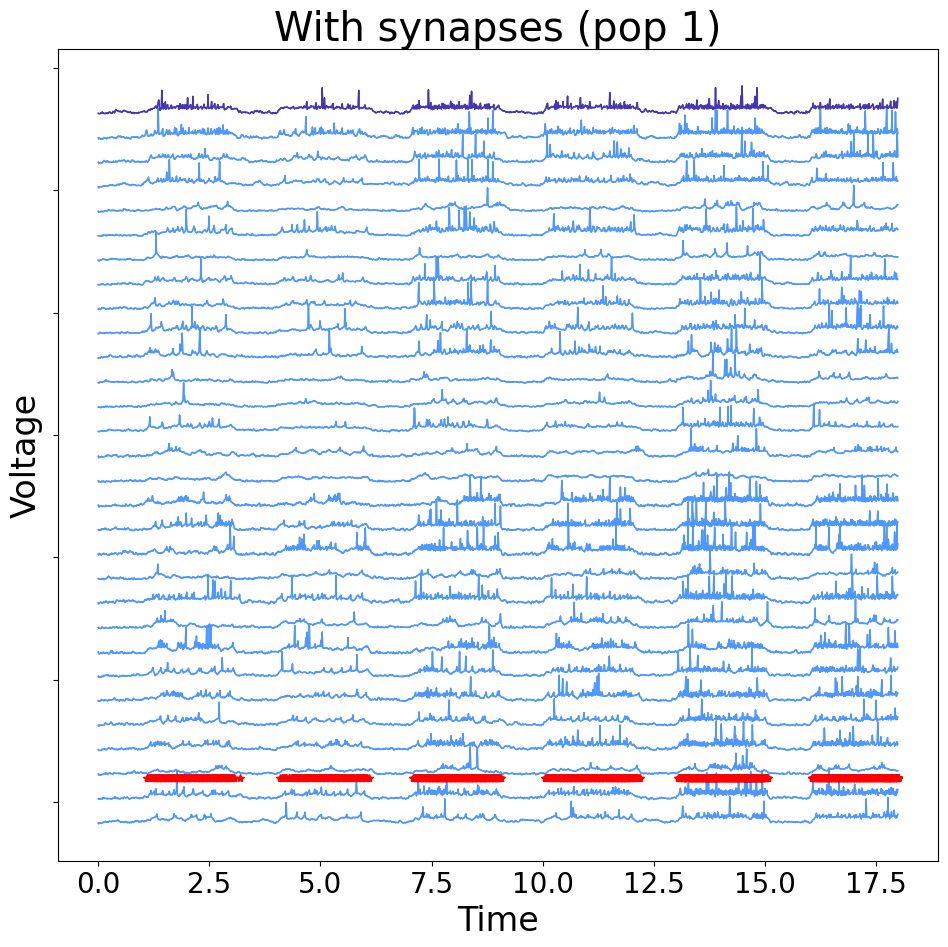

In [23]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 1)",
                            trace_id=pop_id_1)

Plotting traces: [ 0  1  2  3  4  7  8  9 10 12 13 14 15 19 20 23 27 29 33 34 36 38 42 43
 48 50 51 52 54 55]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1_contralateral/figures/Network-voltage-trace--dSPN-traces.pdf


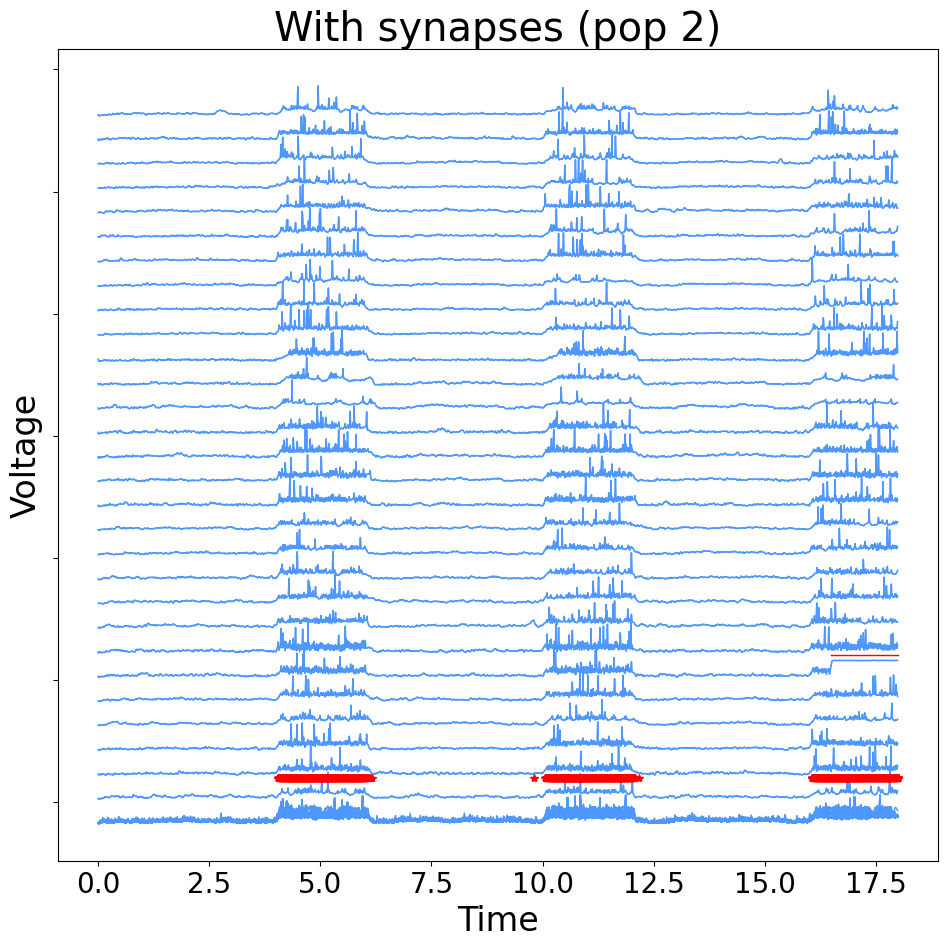

In [24]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 2)",
                            trace_id=pop_id_2)

In [25]:
from snudda.plotting.plot_traces import PlotTraces
pt_no_syn = PlotTraces(output_file=simulation_file_no_synapses, network_file=network_file)
# Use trace_id to specify which traces

Loading network info from ../networks/sten_1_contralateral/network-synapses-minimal.hdf5
Loading input info from ../networks/sten_1_contralateral/input-spikes.hdf5
Loading ../networks/sten_1_contralateral/simulation/output-no-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
747: (dSPN_0, pb0529fb9, m37886c78)
1088: (dSPN_0, p7aa400d6, m37886c78)
2072: (iSPN_3, p57956f10, m1083058d)
2132: (dSPN_0, p1863c9a5, mc710c1a4)
2585: (dSPN_0, pe6ec2d4b, mc710c1a4)
2621: (dSPN_0, p1863c9a5, m22be6817)
2723: (dSPN_2, p185b99a1, mdf60297d)
4117: (dSPN_0, pb0529fb9, m37886c78)
4430: (dSPN_0, p1863c9a5, m22be6817)
4447: (dSPN_0, pb0529fb9, mbb8e5b24)
4817: (dSPN_0, p7aa400d6, m22be6817)
5108: (iSPN_3, p57956f10, m1083058d)
5359: (dSPN_0, p1863c9a5, m22be6817)
5360: (dSPN_0, pb0529fb9, mbb8e5b24)
5704: (dSPN_0, p8bf90d1f, m9fda9b20)
6078: (dSPN_0, pb0529fb9, m9fda9b20)
6115: (dSPN_2, pb267a31a, mf0350288)
6361: (dSPN_2, pb267a31a, mf035

In [26]:
pop_id_1 = pt_no_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_no_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [ 5  6 11 16 17 18 21 22 24 25 26 28 30 31 32 35 37 39 40 41 44 45 46 47
 49 53 57 58 60 64]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1_contralateral/figures/Network-voltage-trace--iSPN-dSPN.pdf


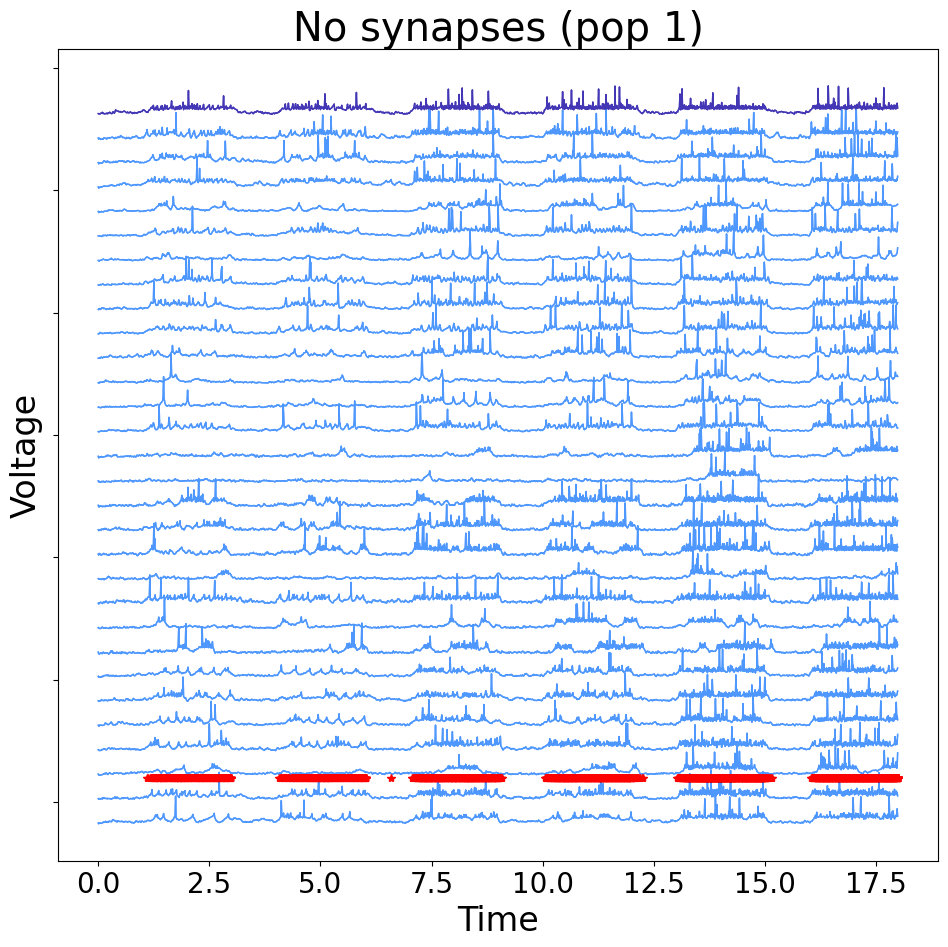

In [27]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 1)",
                           trace_id=pop_id_1)

Plotting traces: [ 0  1  2  3  4  7  8  9 10 12 13 14 15 19 20 23 27 29 33 34 36 38 42 43
 48 50 51 52 54 55]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1_contralateral/figures/Network-voltage-trace--dSPN-traces.pdf


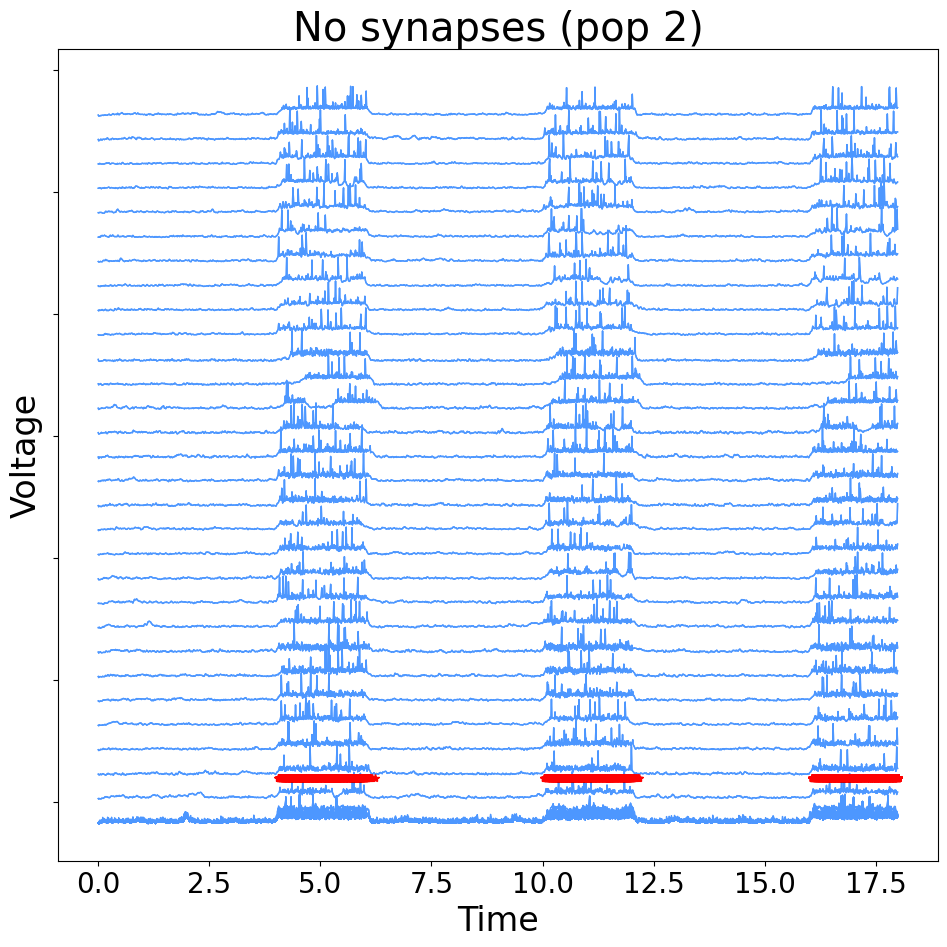

In [28]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 2)",
                           trace_id=pop_id_2)

# Plot neuron with depolarisation block

In [29]:
bad_idx_with_syn = np.unique([x[0] for x in pt_with_syn.output_load.depolarisation_block])
bad_idx_no_syn = np.unique([x[0] for x in pt_no_syn.output_load.depolarisation_block])

# Should be same network (with syn and without syn)
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2)

bad_idx_with_syn_1 = np.intersect1d(bad_idx_with_syn, pop_id_1)
bad_idx_with_syn_2 = np.intersect1d(bad_idx_with_syn, pop_id_2)

bad_idx_no_syn_1 = np.intersect1d(bad_idx_no_syn, pop_id_1)
bad_idx_no_syn_2 = np.intersect1d(bad_idx_no_syn, pop_id_2)

Plotting traces: [ 909  916 1403 1421 1432 2116 2130 2584 2621 3435 3454 3784 3795 3800
 4125 4129 4430 4432 4435 4805 5356 5363 5663 5668 5693 5699 6282 6293
 6608 6611 6616 7461 7978]
Plotted 33 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1_contralateral/figures/Network-voltage-trace--dSPN-traces.pdf


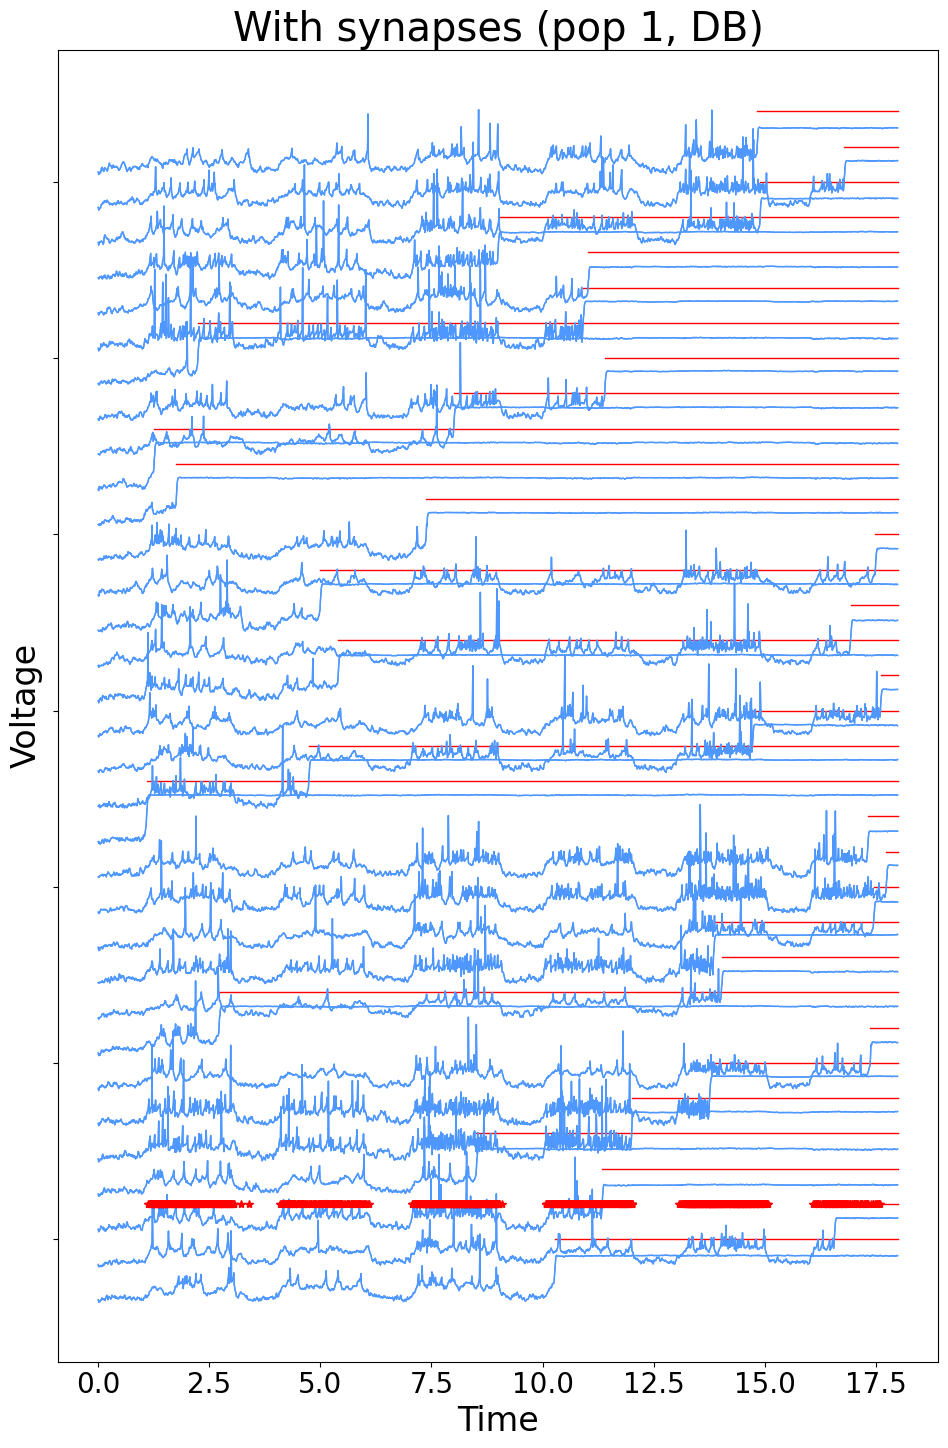

In [30]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 1, DB)",
                            trace_id=bad_idx_with_syn_1)

Plotting traces: [   8  141  564 1078 1400 1408 1803 2461 2577 2616 3792 3805 3806 4081
 4085 4100 4105 4446 4776 4806 4812 4823 5140 5677 6155 6290 6911 7045
 7358 7460 7757]
Plotted 31 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1_contralateral/figures/Network-voltage-trace--dSPN-traces.pdf


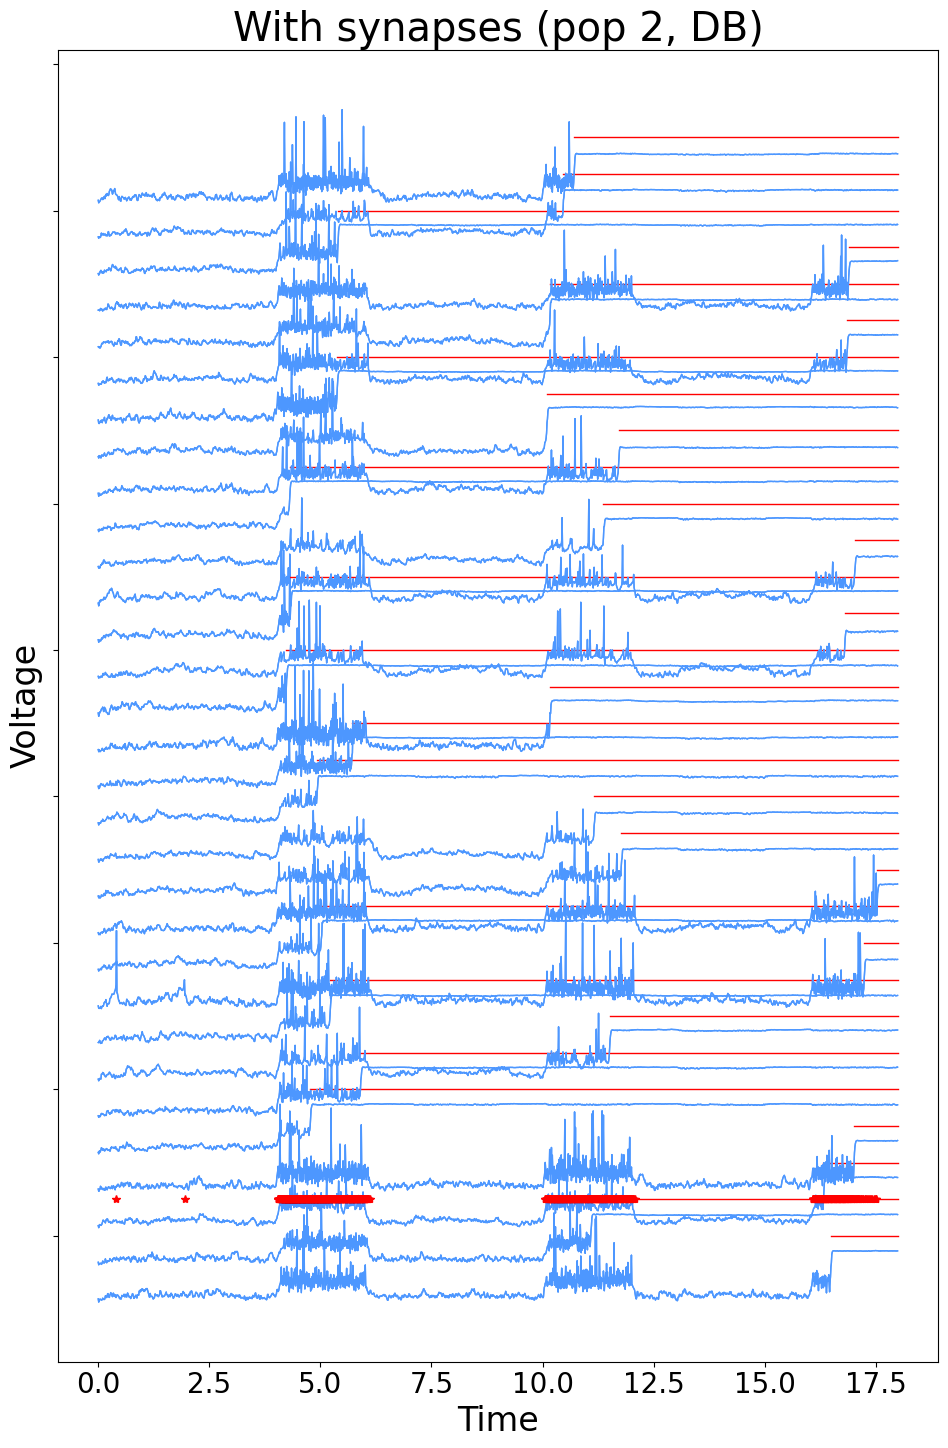

In [31]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 2, DB)",
                            trace_id=bad_idx_with_syn_2)

Plotting traces: [1088 2132 2585 2621 2723 4117 4430 4447 4817 5359 5360 5704 6078 6115
 6361 7225 7756 7878]
Plotted 18 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1_contralateral/figures/Network-voltage-trace--dSPN-traces.pdf


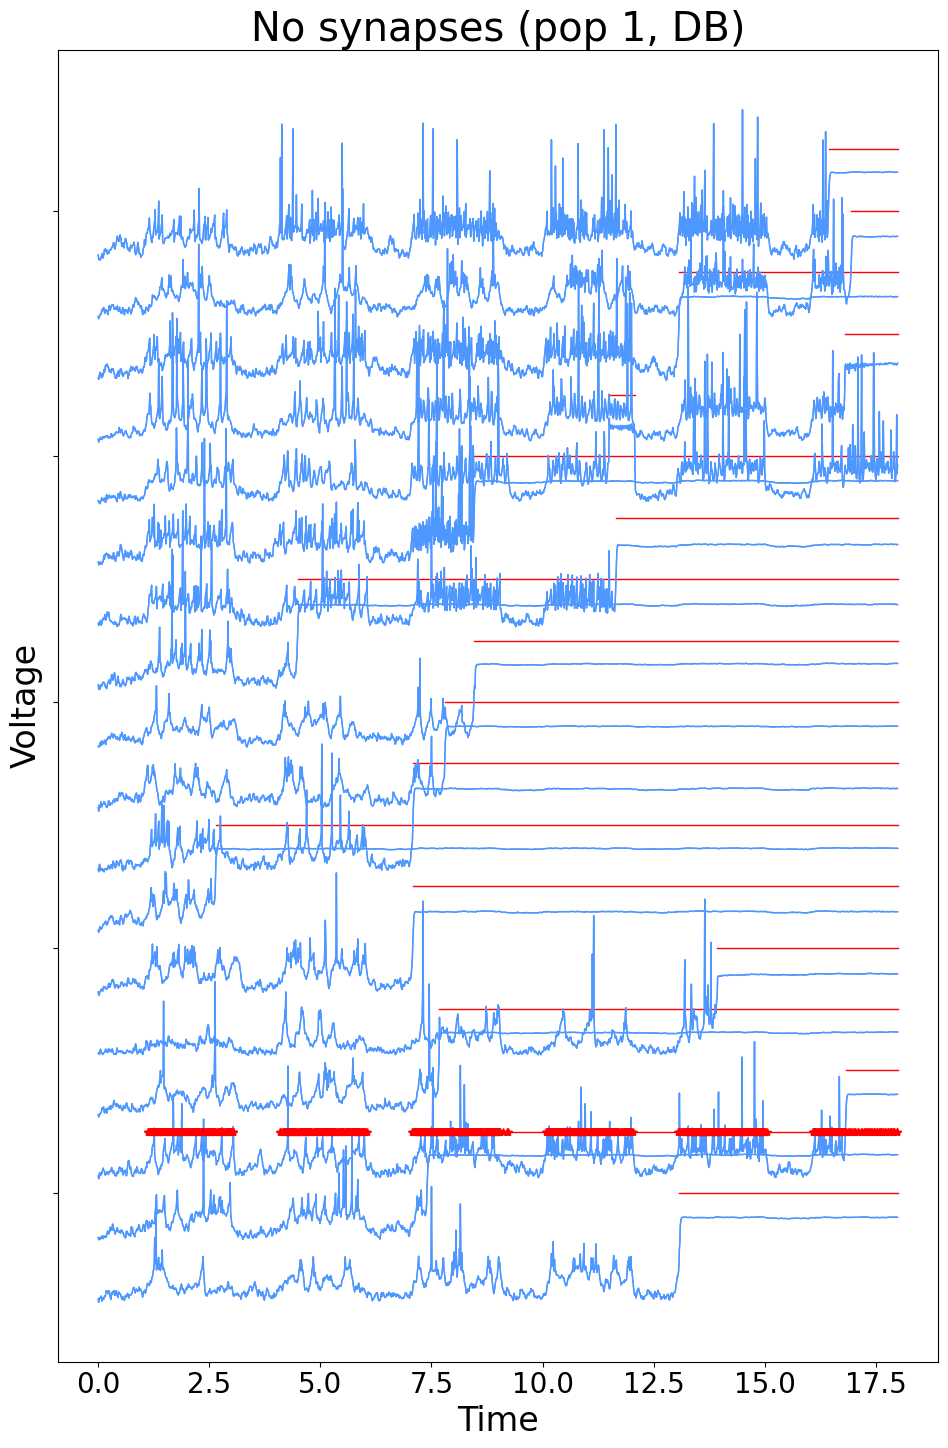

In [32]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 1, DB)",
                           trace_id=bad_idx_no_syn_1)

Plotting traces: [ 747 2072 5108 7029 7435 7437]
Plotted 6 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1_contralateral/figures/Network-voltage-trace--iSPN-dSPN.pdf


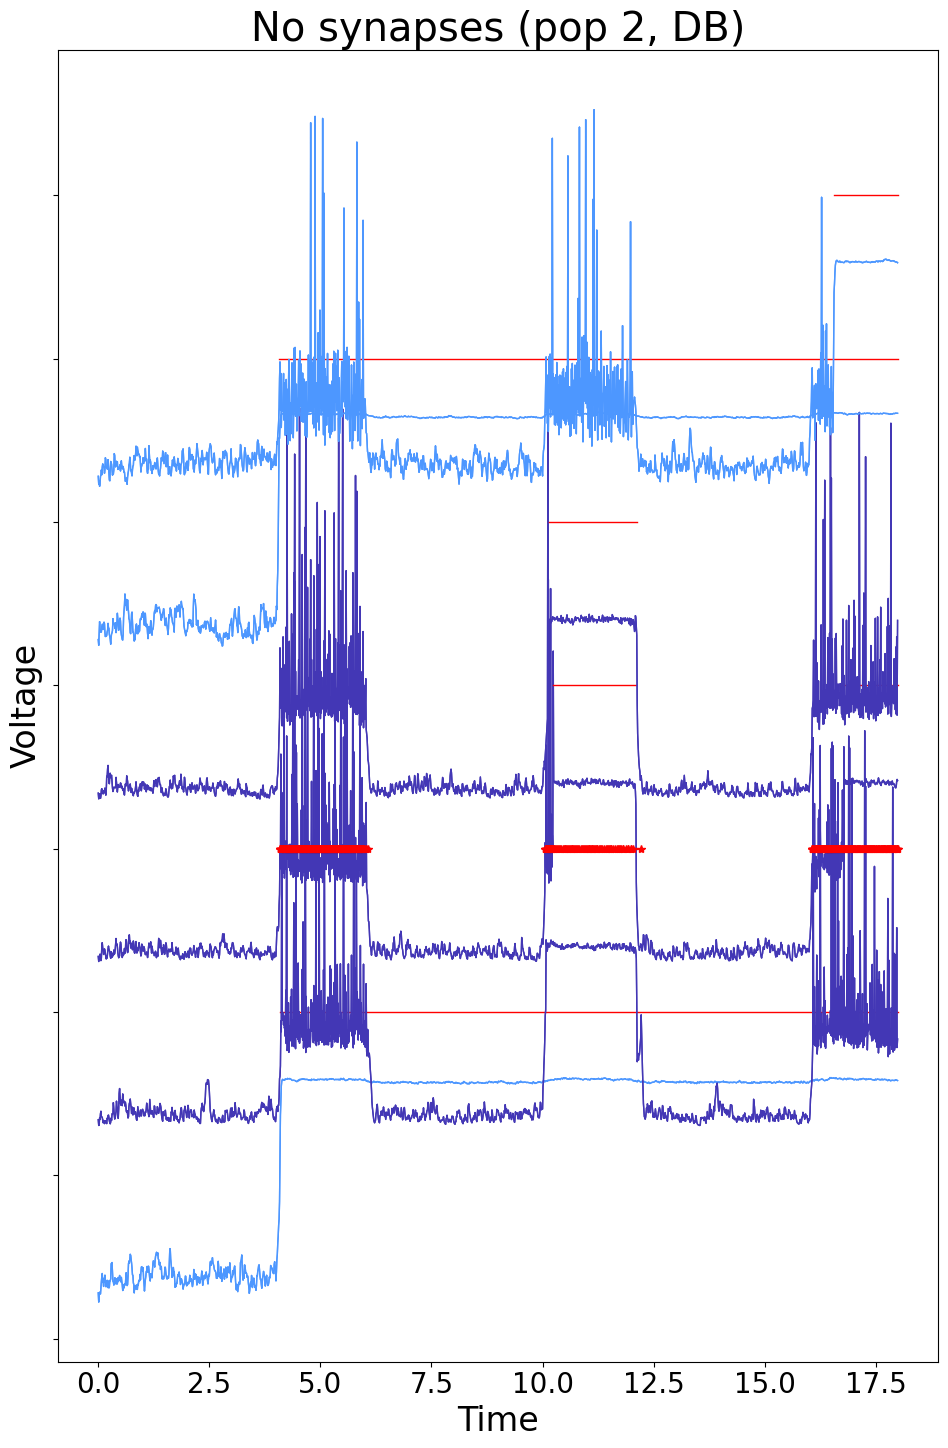

In [33]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 2, DB)",
                           trace_id=bad_idx_no_syn_2)